In [39]:
using LsqFit, CairoMakie, PerceptualColourMaps

function colourWheel(map,name="cmap.svg")
    fig = Figure()
    ax = Axis(fig[1,1])
    ax.aspect=AxisAspect(1)

    step = 16
    x = collect(1:step:256)
    c = [map[i] for i in x]

    hidedecorations!(ax)
    hidespines!(ax)

    pie!(ax,
        ones(length(x)),
        color=c,
        strokewidth=1,
        strokecolor=RGBAf0(1,1,1,0),
        vertex_per_deg=1
    )
    save(name,fig)
    fig
end

function colourMapToPolynomial(Map)
    @. model(x,p) = p[1]+x*p[2]+x*x*p[3]+x*x*x*p[4]+p[5]*x^4
    t = range(0.0,1.0,length=256);
    
    M = [Map[i] for i in 1:256]

    R = Base.map(x->x.r,M)
    G = Base.map(x->x.g,M)
    B = Base.map(x->x.b,M)

    fitR = curve_fit(model,t,R,[0.,0.,0.,0.,0.]);
    fitG = curve_fit(model,t,G,[0.,0.,0.,0.,0.]);
    fitB = curve_fit(model,t,B,[0.,0.,0.,0.,0.]);

    fitR,fitG,fitB
end

function savePoly(r,g,b,name="cmap")
    shader = "vec3 cmap$name(float t){
    return vec3( poly(t,$(join(string.(round.(r.param,digits=2)),", "))), poly(t,$(join(string.(round.(g.param,digits=2)),", "))), poly(t,$(join(string.(round.(b.param,digits=2)),", "))) );
}"
    open(name,"w") do io write(io,shader) end
end

savePoly (generic function with 2 methods)

162

In [13]:
join(string.(round.(r.param,digits=2)),", ")

"0.91, 3.74, -32.33, 57.57, -28.99"

In [15]:
"vec3 cmapR1(float t){
    return vec3( poly($(join(string.(round.(r.param,digits=2)),", "))), poly($(join(string.(round.(g.param,digits=2)),", "))), poly($(join(string.(round.(b.param,digits=2)),", "))) );
}"

"vec3 cmapR1(float t){\n    return vec3( poly(0.91, 3.74, -32.33, 57.57, -28.99), poly(0.2, 5.6, -18.89, 25.55, -12.25), poly(0.22, -4.89, 22.31, -23.58, 5.97) );\n}"

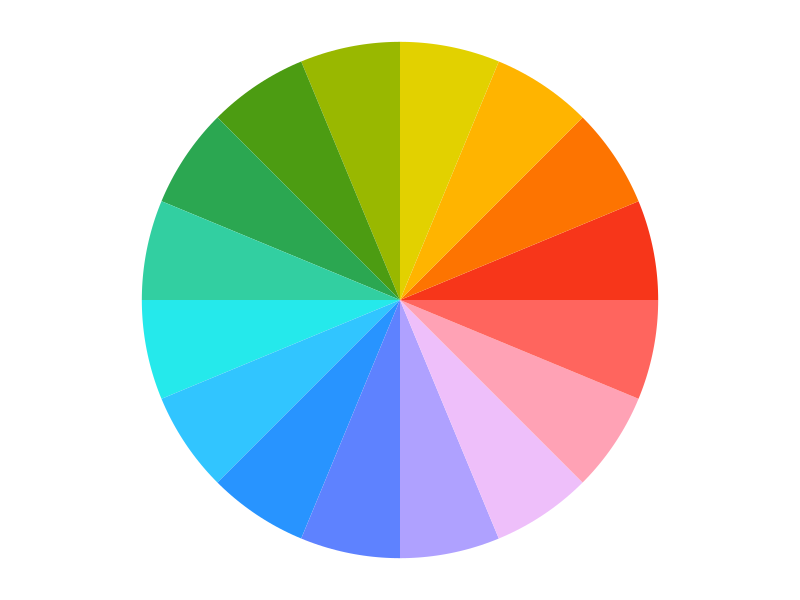

In [25]:
r,g,b = colourMapToPolynomial(cmap("C6"))
savePoly(r,g,b,"R1")
colourWheel(cmap("C6"),"rainbow.svg")

In [26]:
tB = RGBf0(91/255,206/255,250/255)
tP = RGBf0(245/255,169/255,184/255)
tW = RGBf0(1.,1.,1.);

In [27]:
function mix(c1,c2,alpha)

    return RGBf0(
        c1.r*alpha+c2.r*(1-alpha),
        c1.g*alpha+c2.g*(1-alpha),
        c1.b*alpha+c2.b*(1-alpha)
    )
    
end

mix (generic function with 1 method)

In [28]:
c = Vector{RGBf0}()
for i in 1:256
    if (i <= 86)
        push!(c, mix(tB,tP,(1.0-i/86.0)))
    elseif (i > 86 && i <= 172)
        push!(c, mix(tP,tW,(1.0-(i-86)/86.0)))
    elseif (i > 172)
        push!(c, mix(tW,tB,(1.0-(i-172)/86)))
    end
end

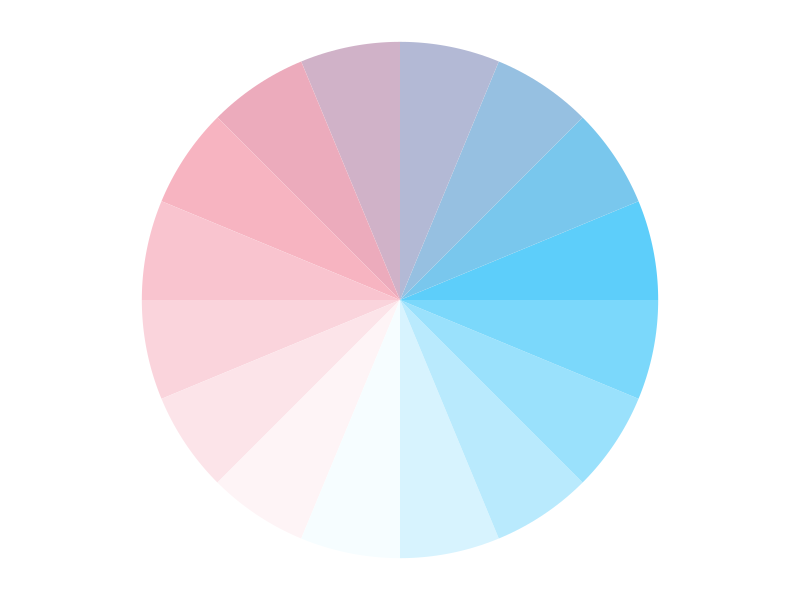

In [29]:
r,g,b = colourMapToPolynomial(c)
savePoly(r,g,b,"trans")
colourWheel(c,"trans.svg")

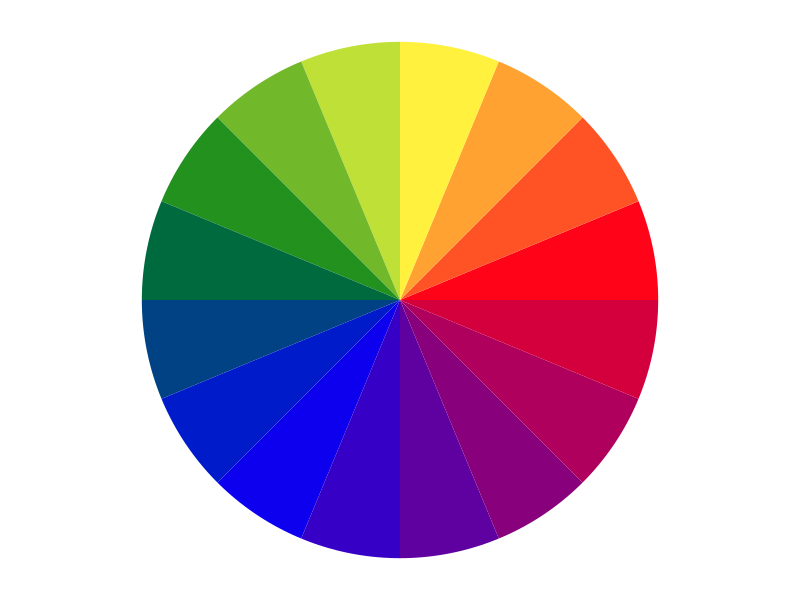

In [40]:
c = Vector{RGBf0}()

A = RGBf0(255/255,0,25/255)
B = RGBf0(255/255,165/255,44/255)
B = RGBf0(255/255,255/255,65/255)
C = RGBf0(0.,128/255,24/255)
D = RGBf0(0.,0.,249/255)
E = RGBf0(134/255,0/255,125/255)

s = 256/5|>ceil|>Int

for i in 1:256

    if (i <= s)
        push!(c, mix(A,B,(1.0-i/s)))
    elseif (s < i <= 2*s)
        push!(c, mix(B,C,(1.0-(i-s)/s)))
    elseif (2*s < i <= 3*s)
        push!(c, mix(C,D,(1.0-(i-2*s)/s)))
    elseif (3*s < i <= 4*s)
        push!(c, mix(D,E,(1.0-(i-3*s)/s)))
    elseif (4*s < i <= 5*s)
        push!(c, mix(E,A,(1.0-(i-4*s)/s)))
    end
    
end

r,g,b = colourMapToPolynomial(c)
savePoly(r,g,b,"pride")
colourWheel(c,"pride.svg")

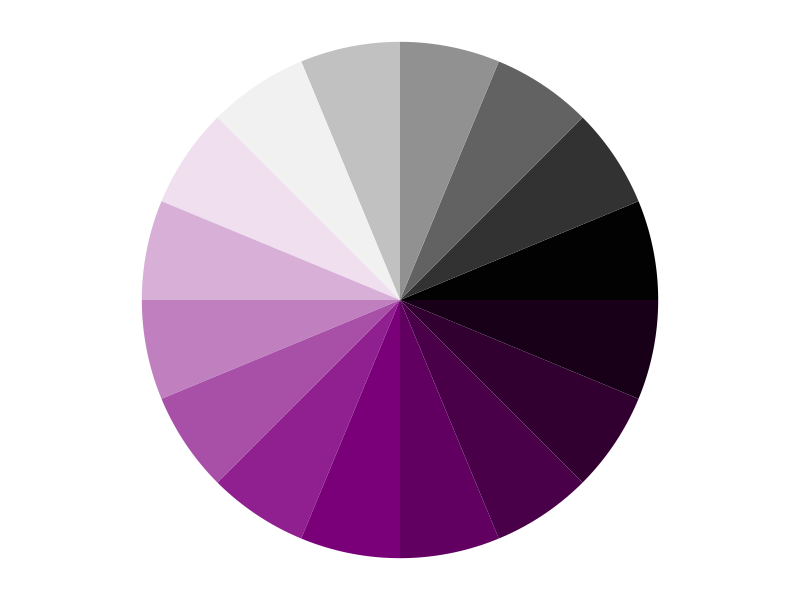

In [30]:
tB = RGBf0(0,0,0)
tP = RGBf0(1,1,1)
tW = RGBf0(128/255,0,128/255);

c = Vector{RGBf0}()
for i in 1:256
    if (i <= 86)
        push!(c, mix(tB,tP,(1.0-i/86.0)))
    elseif (i > 86 && i <= 172)
        push!(c, mix(tP,tW,(1.0-(i-86)/86.0)))
    elseif (i > 172)
        push!(c, mix(tW,tB,(1.0-(i-172)/86)))
    end
end

r,g,b = colourMapToPolynomial(c)
savePoly(r,g,b,"ace")
colourWheel(c,"ace.svg")

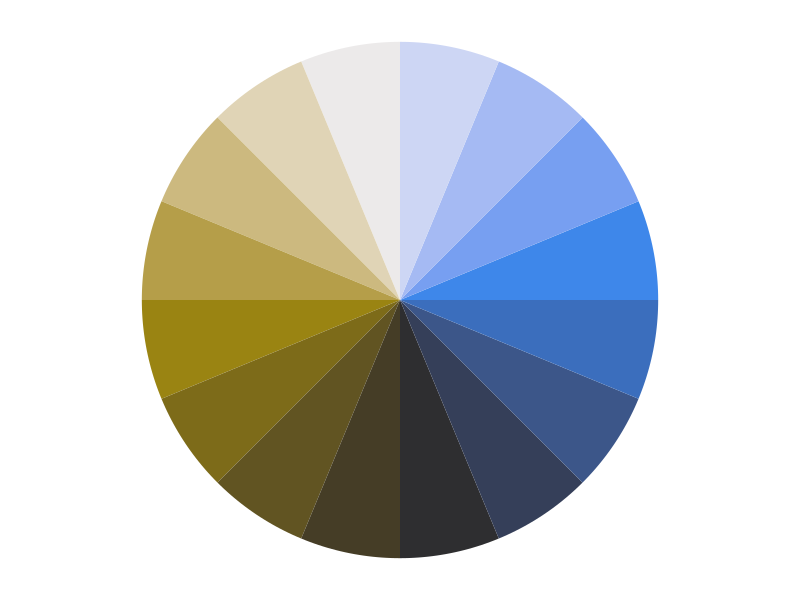

In [31]:
r,g,b = colourMapToPolynomial(cmap("CBC1"))
savePoly(r,g,b,"cb1")
colourWheel(cmap("CBC1"),"cblind1.svg")

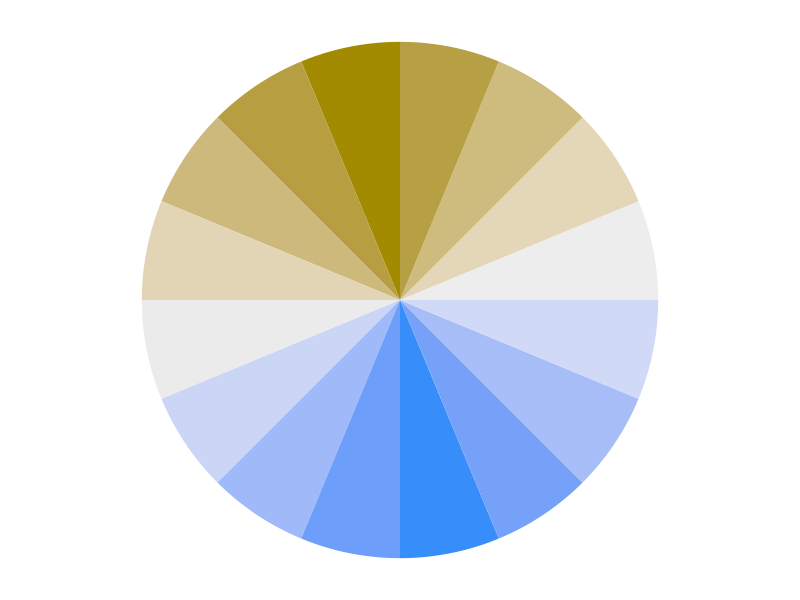

In [32]:
r,g,b = colourMapToPolynomial(cmap("CBC2"))
savePoly(r,g,b,"cb2")
colourWheel(cmap("CBC2"),"cblind2.svg")

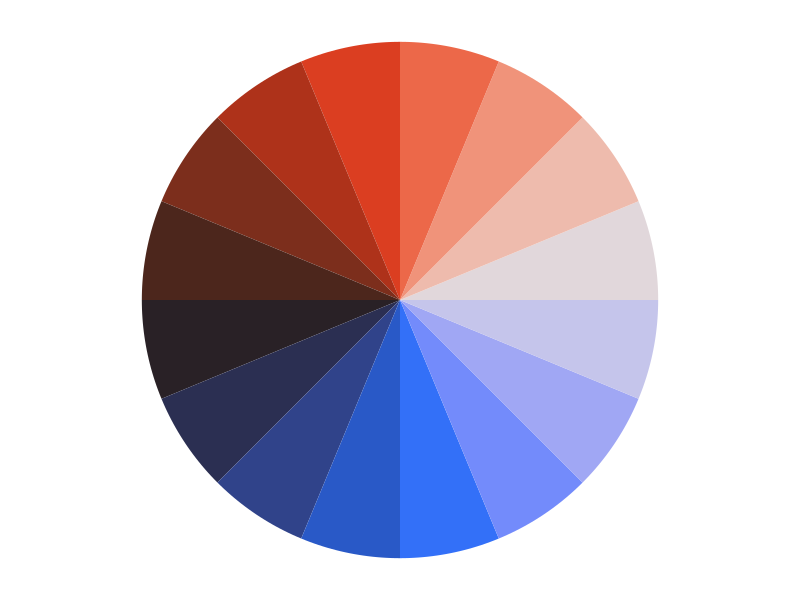

In [33]:
r,g,b = colourMapToPolynomial(cmap("C3"))
savePoly(r,g,b,"C3")
colourWheel(cmap("C3"),"C3.svg")

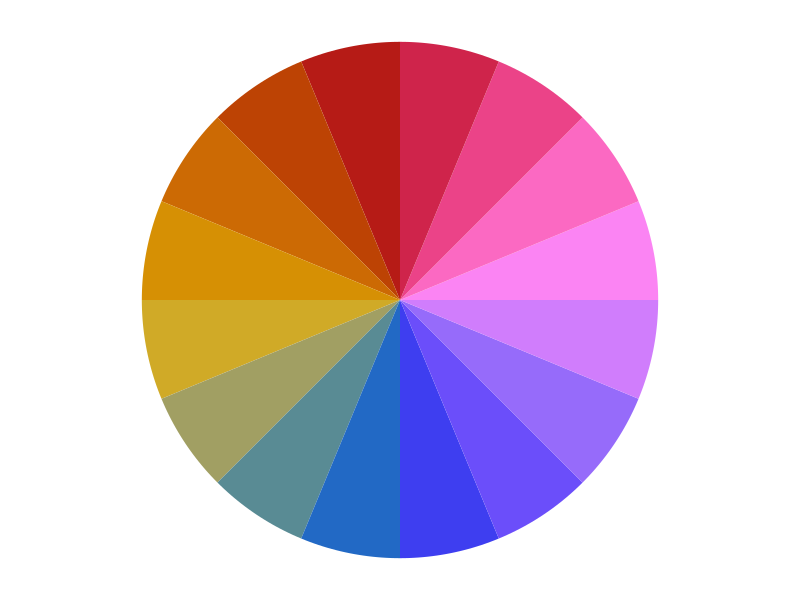

In [35]:
r,g,b = colourMapToPolynomial(cmap("C1"))
savePoly(r,g,b,"R2")
colourWheel(cmap("C1"),"C1.svg")

In [34]:
using DelimitedFiles

In [38]:
savePoly(fitR,fitG,fitB)

In [15]:
Map = cmap("CBC1")

@. model(x,p) = p[1]+x*p[2]+x*x*p[3]+x*x*x*p[4]+p[5]*x^4
t = range(0.0,1.0,length=256);

R = Base.map(x->x.r,Map)
G = Base.map(x->x.g,Map)
B = Base.map(x->x.b,Map)

fitR = curve_fit(model,t,R,[0.,0.,0.,0.,0.,0.,0.]);
fitG = curve_fit(model,t,G,[0.,0.,0.,0.,0.,0.,0.]);
fitB = curve_fit(model,t,B,[0.,0.,0.,0.,0.,0.,0.]);

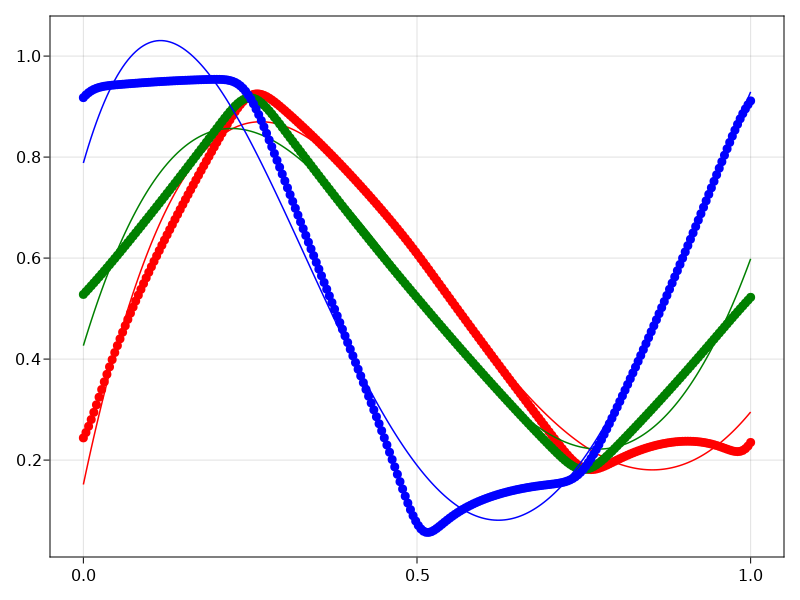

In [16]:
fig = Figure()
ax = Axis(fig[1,1])

lines!(t,model(t,fitR.param),color=:red)
scatter!(t,R,color=:red)

lines!(t,model(t,fitG.param),color=:green)
scatter!(t,G,color=:green)

lines!(t,model(t,fitB.param),color=:blue)
scatter!(t,B,color=:blue)

fig

In [32]:
fitR,fitG,fitB = colourMapToPolynomial(cmap("CBC1"))

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.15164614253824948, 6.2712574907872165, -16.92135798895214, 14.001130293505652, -3.2074808670360375], [-0.09229209367966024, -0.07868954475778003, -0.0670926292271962, -0.05719376639369375, -0.04866770565739098, -0.041205342597286754, -0.034536310323963426, -0.028440340410333886, -0.02274957993711335, -0.017344746627802887  …  0.024234168614790996, 0.030797338550621056, 0.03729708234988416, 0.04353381478987223, 0.04925632371388672, 0.054172962665809954, 0.05797683801409831, 0.060384198729155236, 0.06117934219738319, 0.06025407710260883], [1.000000000000636 0.0 … 0.0 0.0; 1.000000000000636 0.00392156862776174 … 6.030864000102681e-8 2.365034172848825e-10; … ; 0.9999999998768797 0.9960784313849713 … 0.9882813699195079 0.984405756690337; 0.9999999998768797 1.0000000000109057 … 1.0000000000098745 1.0000000000040237], true, Float64[]), LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float6

In [28]:
c = Vector{RGBf0}();
for i in 1:256
    push!(c,
        RGBf0(model(t[i],fitR.param),model(t[i],fitG.param),model(t[i],fitB.param))
    )
end
c

In [29]:
Map

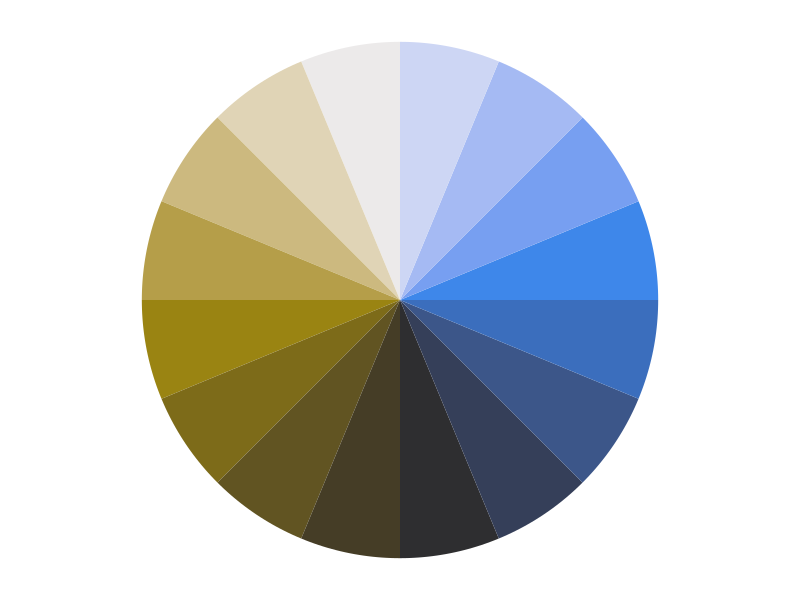